In [143]:
import pandas as pd
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [144]:
gold_data_path = r'C:\Users\Bishal\PycharmProjects\machineLearning1\src\datasets\goldstock.csv'
gold_data = pd.read_csv(gold_data_path)

In [145]:
# Create a new column for price movement direction
gold_data['Price_Move'] = gold_data['Close'].diff().apply(lambda x: 'Down' if x < 0 else ('Same' if x == 0 else 'Up'))

In [146]:
# Select features
features = gold_data[['Volume', 'Open', 'High', 'Low']]


In [147]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(gold_data.Price_Move)

In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, gold_data['Price_Move'], test_size=0.2, random_state=42)

In [149]:
print(X_train.shape, X_test.shape)

(2008, 4) (503, 4)


In [150]:
# Create a Decision Tree model
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [151]:
model = dtc.fit(X_train, y_train)

In [152]:
predictions = model.predict(X_test)

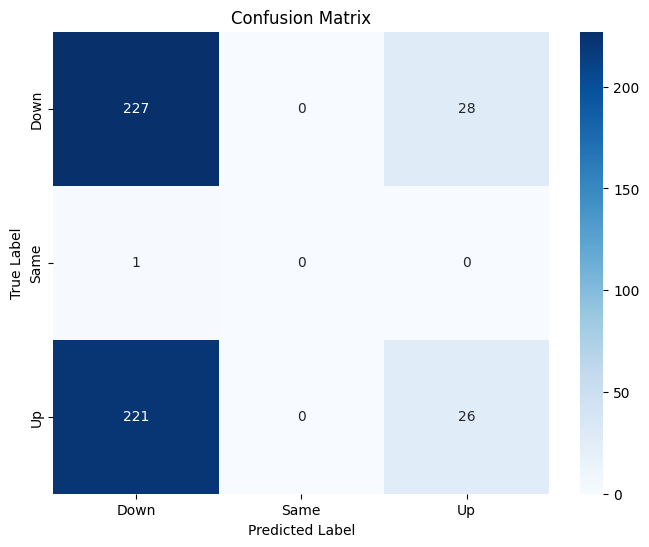

In [153]:
matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [154]:
classification_rep = classification_report(y_test, predictions, zero_division=1)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

        Down       0.51      0.89      0.64       255
        Same       1.00      0.00      0.00         1
          Up       0.48      0.11      0.17       247

    accuracy                           0.50       503
   macro avg       0.66      0.33      0.27       503
weighted avg       0.49      0.50      0.41       503


In [155]:
dot_data = export_graphviz(
    model, out_file=None, feature_names=features.columns,
    filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')

'decision_tree.png'

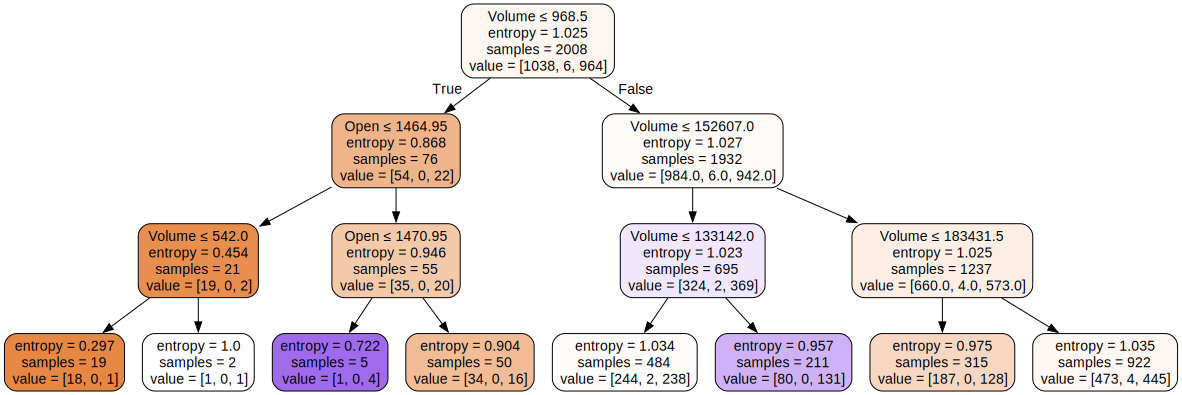

In [156]:
graph